In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
plt.ion()
import yt
#yt.enable_parallelism()
from tools import my_field_def, unit_base, subhalo_center, ray_end_from_sph, make_projection, get_2Mpc_LG_dataset, get_mw_center_2Mpc_LG

In [3]:
ds = get_2Mpc_LG_dataset()

mw_center = get_mw_center_2Mpc_LG()

yt : [INFO     ] 2019-02-03 18:58:22,543 Calculating time from 1.000e+00 to be 4.336e+17 seconds
yt : [INFO     ] 2019-02-03 18:58:22,557 Parameters: current_time              = 4.336488085281229e+17 s
yt : [INFO     ] 2019-02-03 18:58:22,557 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2019-02-03 18:58:22,558 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-02-03 18:58:22,558 Parameters: domain_right_edge         = [64000. 64000. 64000.]
yt : [INFO     ] 2019-02-03 18:58:22,558 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-02-03 18:58:22,559 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2019-02-03 18:58:22,559 Parameters: omega_lambda              = 0.721
yt : [INFO     ] 2019-02-03 18:58:22,560 Parameters: omega_matter              = 0.279
yt : [INFO     ] 2019-02-03 18:58:22,560 Parameters: hubble_constant           = 0.7


yt : [INFO     ] 2019-02-03 20:41:45,885 Projection completed
yt : [INFO     ] 2019-02-03 20:41:45,886 xlim = 32705.150391 32725.150391
yt : [INFO     ] 2019-02-03 20:41:45,886 ylim = 32887.707031 32907.707031
yt : [INFO     ] 2019-02-03 20:41:45,887 xlim = 32705.150391 32725.150391
yt : [INFO     ] 2019-02-03 20:41:45,887 ylim = 32887.707031 32907.707031
yt : [INFO     ] 2019-02-03 20:41:45,888 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



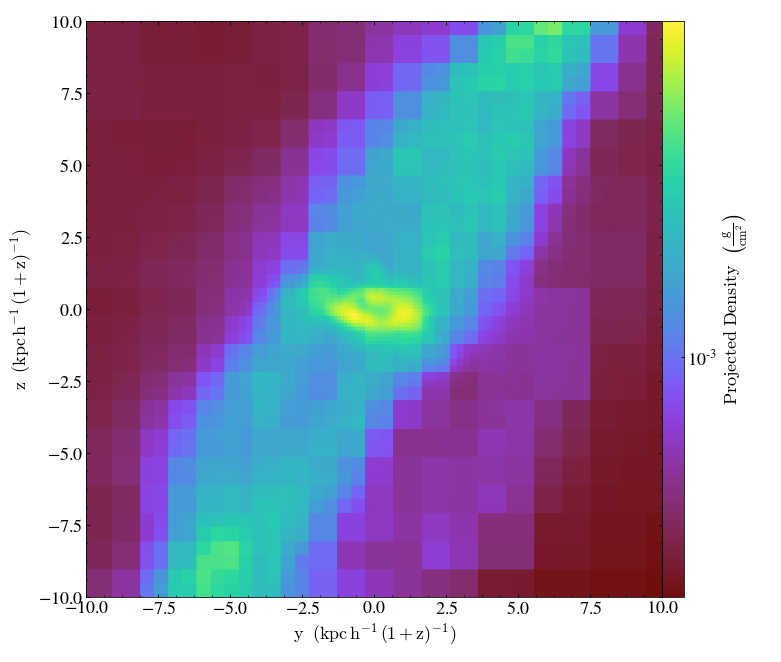

In [24]:
px = make_projection(ds, mw_center, 20, 'x')
px.show()


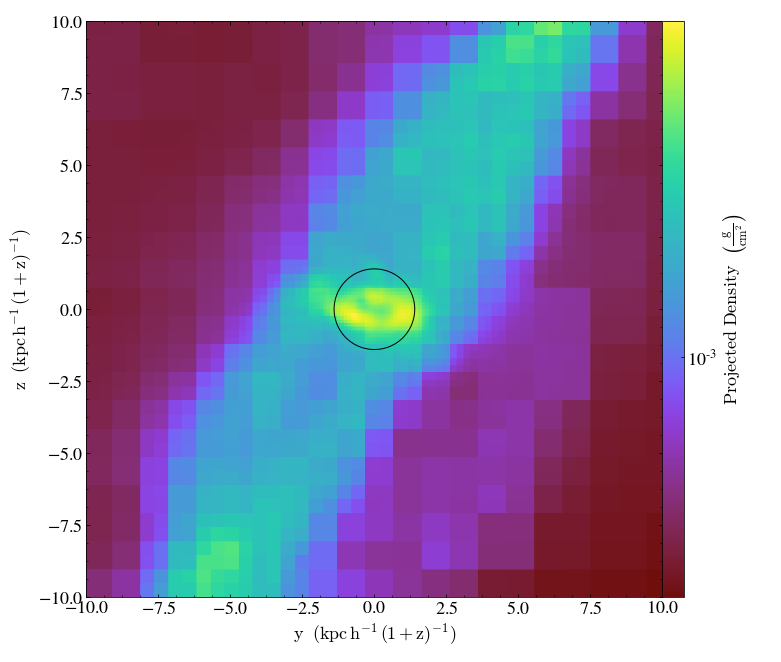

In [5]:

px.annotate_sphere(list(mw_center), radius=(2, 'kpc'),
                  circle_args={'color':'black'})

In [6]:
rot = np.array([[0.38444049,-0.89949922,-0.20762143],
       [0.70601157,0.43138525,-0.56165330],
       [0.59477153,0.069339139,0.80089882]])

In [7]:
rot

array([[ 0.38444049, -0.89949922, -0.20762143],
       [ 0.70601157,  0.43138525, -0.5616533 ],
       [ 0.59477153,  0.06933914,  0.80089882]])

In [8]:
new_z_axis = rot.transpose() @ np.array([0,0,1])
new_z_axis *= 2/np.linalg.norm(new_z_axis)
# point_to_perp = mw_center + z_axis
# point_to_perp *= 2/np.linalg.norm(point_to_perp)
# point_to_perp += mw_center

In [9]:
print(new_z_axis)
# point_to_perp

[1.18954305 0.13867828 1.60179763]



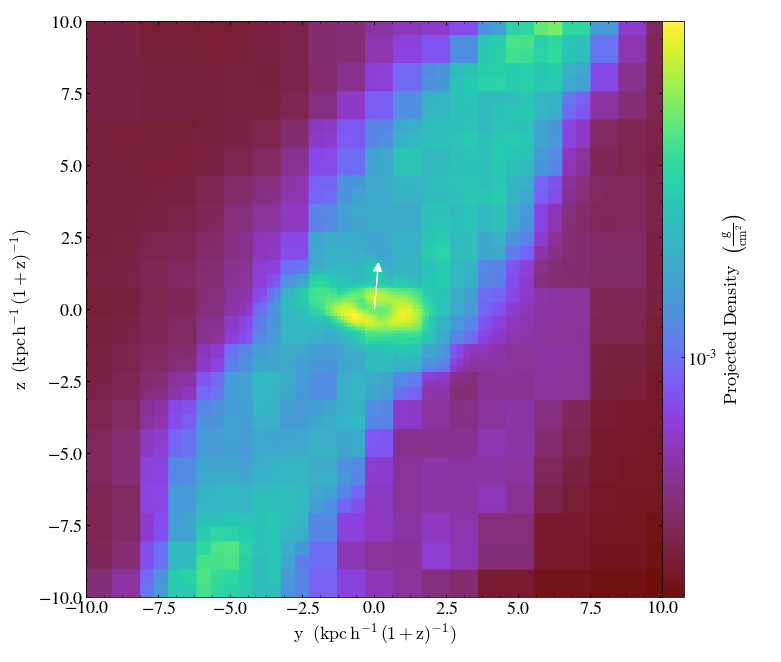

In [36]:
px.annotate_arrow(pos = mw_center+new_z_axis, starting_pos=mw_center)

In [32]:
r = np.cross(new_z_axis, [1,0,0])
r *= 10*0.7/np.linalg.norm(r)

In [33]:
r_sun = mw_center + r
print(mw_center)
print(r_sun)

[21819.64  32715.15  32897.707]
[21819.640625   32722.12430288 32897.10325327]



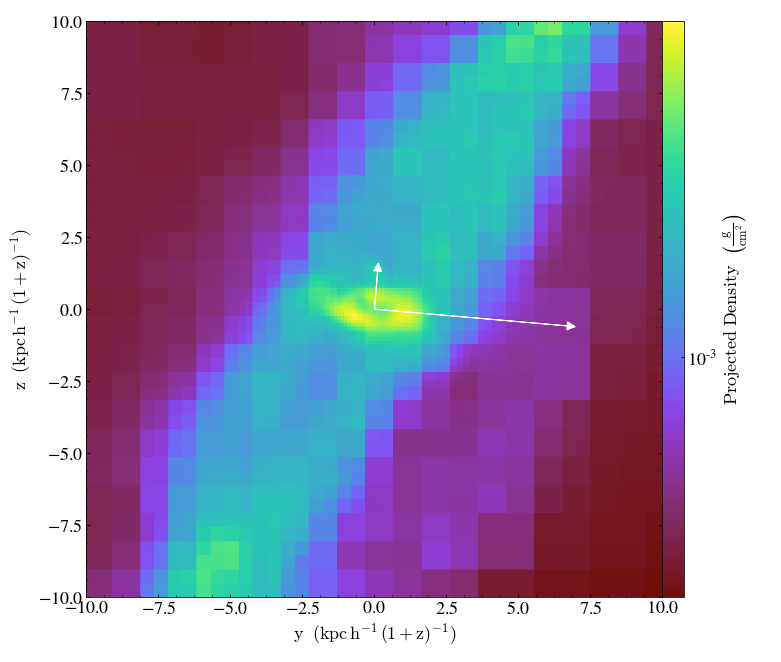

In [37]:
px.annotate_arrow(pos = r_sun, starting_pos=mw_center)


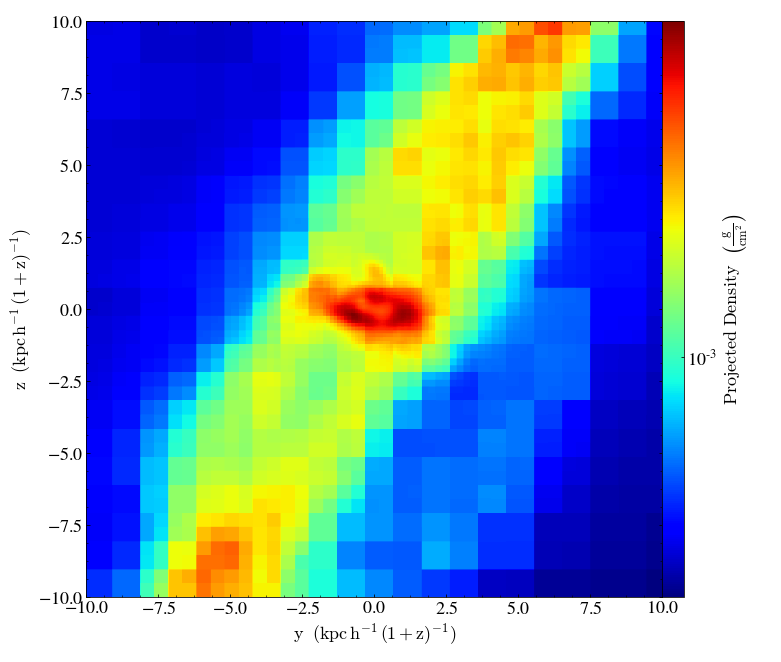

In [23]:
px.set_cmap('density', 'jet')


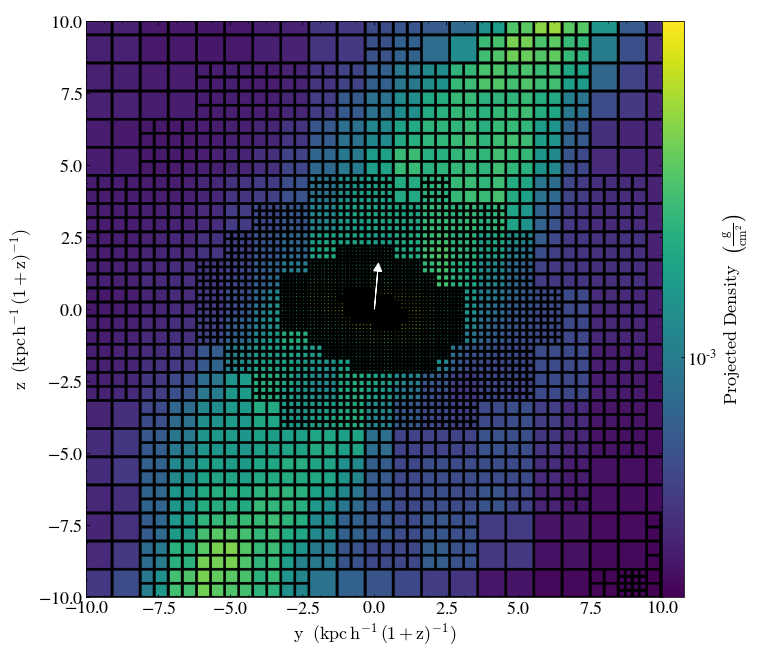

In [18]:
px.annotate_cell_edges()


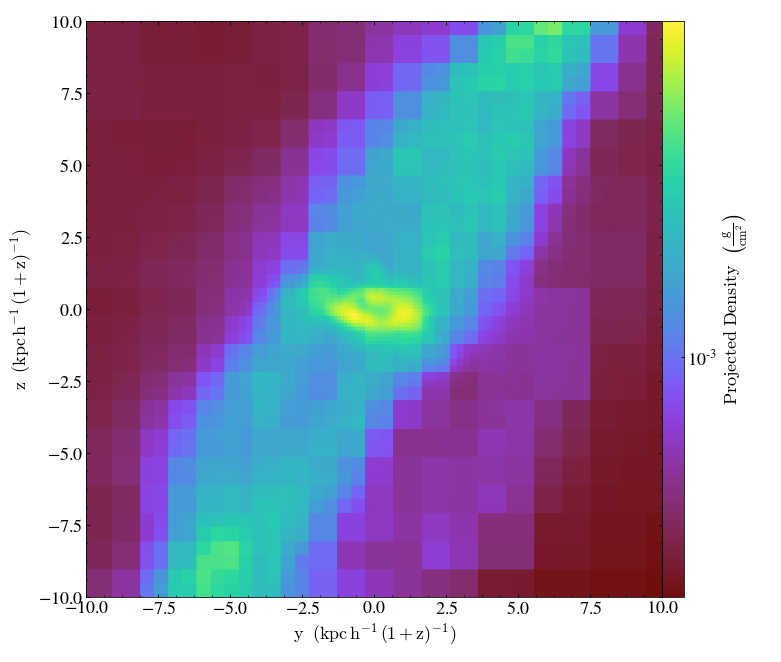

In [35]:
px.annotate_clear()